**Dataset Diabetes**

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
#os.chdir('drive/My Drive/BCML')
#os.listdir('.')

['Untitled0.ipynb',
 'iris.csv',
 'heart.csv',
 'pima-indians-diabetes.csv',
 'sonar.csv']

In [6]:
dataset = pd.read_csv('pima-indians-diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


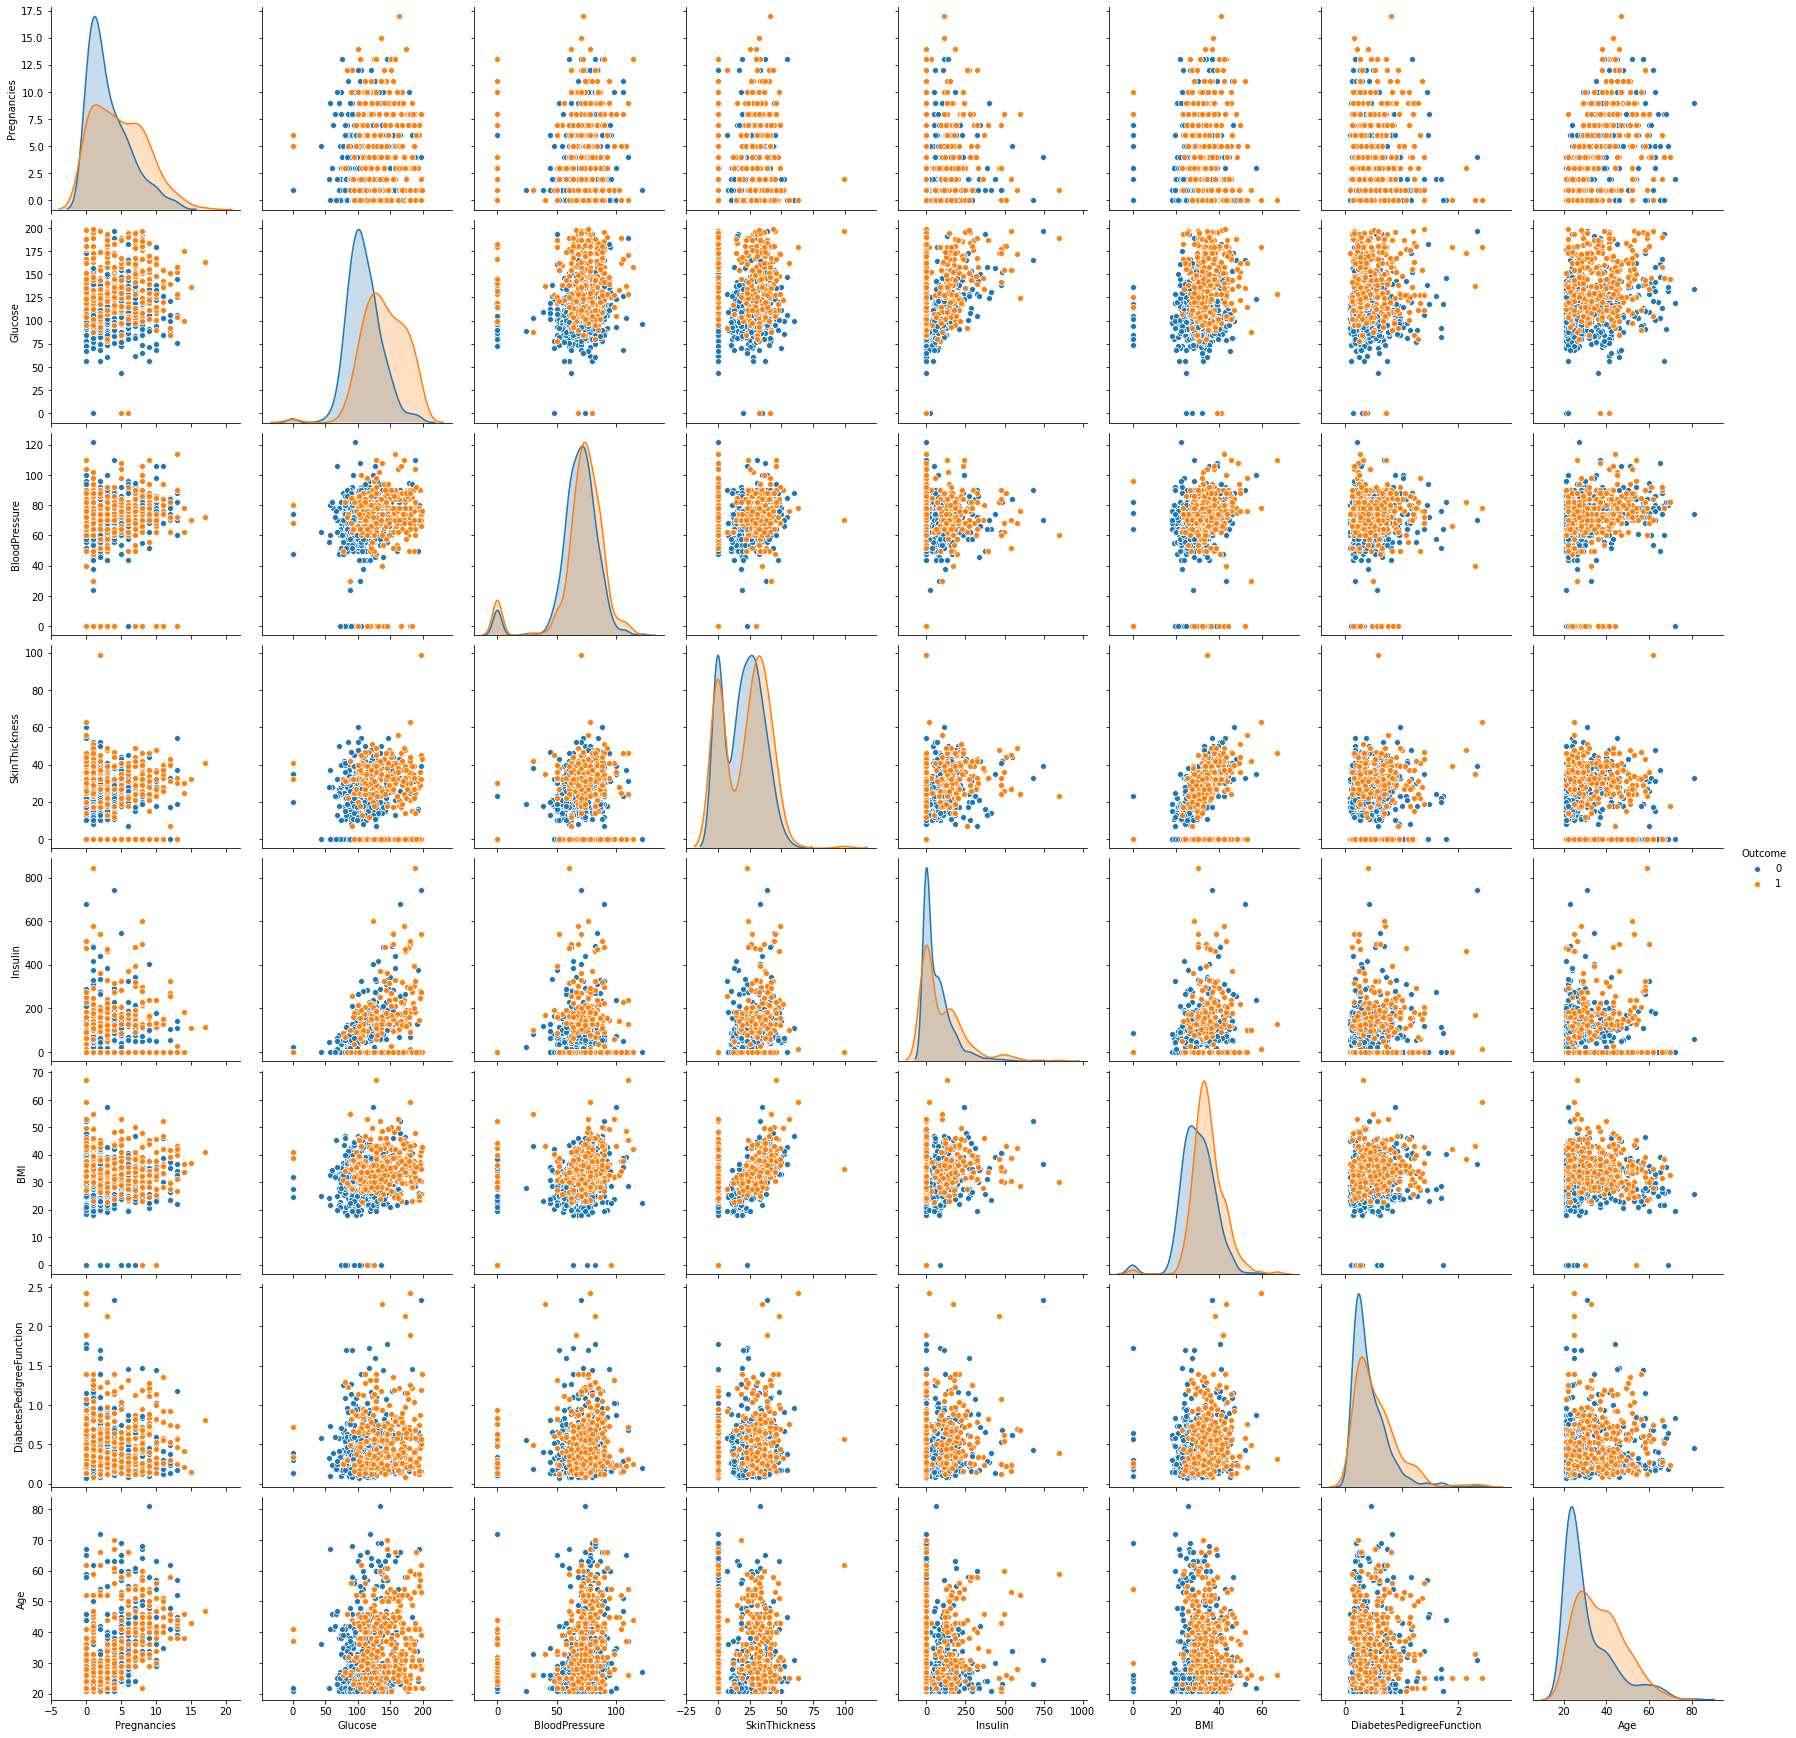

In [1380]:
#sb.pairplot(dataset, hue='Outcome', size=3)
#plt.show()

In [11]:
feature = dataset.drop(['Outcome'], axis=1)
label = dataset['Outcome']

In [12]:
# Scaling data
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures
scaler = PowerTransformer(method='yeo-johnson', standardize=True)
#scaler = PolynomialFeatures()
#scaler = preprocessing.Binarizer()

feature_scaled = scaler.fit_transform(feature.values)

In [419]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label, test_size=0.15, random_state=300)

In [420]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score

log_reg = LogisticRegression(tol=0.25)
log_reg.fit(feature_train, label_train)

predictions = log_reg.predict(feature_train)

print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(log_reg.score(feature_train, label_train))) # .score() -> Accuracy
print(f1_score(label_train, predictions, average='macro'))
print(precision_score(label_train, predictions, average='macro'))
print(recall_score(label_train, predictions, average='macro'))
predictions = log_reg.predict(feature_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(feature_test, label_test))) # .score() -> Accuracy
print(f1_score(label_test, predictions, average='macro'))
print(precision_score(label_test, predictions, average='macro'))
print(recall_score(label_test, predictions, average='macro'))

Accuracy of logistic regression classifier on train set: 0.77
0.7274835748726285
0.7474340476944552
0.7182017543859649
Accuracy of logistic regression classifier on test set: 0.83
0.8015737256243585
0.8177905308464849
0.7914473684210527


In [456]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
for i in range(50, 150 ,25):
  rf_model = RandomForestClassifier(n_estimators=(i), random_state=(20), bootstrap=True, max_features = "sqrt")
  rf_model.fit(feature_train, label_train)
  predictions = rf_model.predict(feature_train)
  print('Accuracy of Random Forest with Estimators = ' +str(i)+ ' on train set: {:.2f}'.format(rf_model.score(feature_train, label_train)))
  print(f1_score(label_train, predictions, average="macro"))
  print(precision_score(label_train, predictions, average="macro"))
  print(recall_score(label_train, predictions, average="macro"))
  predictions = rf_model.predict(feature_test)
  print('Accuracy of Random Forest with Estimators = ' +str(i)+ ' on test set: {:.2f}'.format(rf_model.score(feature_test, label_test)))
  print(f1_score(label_test, predictions, average="macro"))
  print(precision_score(label_test, predictions, average="macro"))
  print(recall_score(label_test, predictions, average="macro"))
  print("")

Accuracy of Random Forest with Estimators = 50 on train set: 1.00
0.9983121707503333
0.9988235294117647
0.9978070175438596
Accuracy of Random Forest with Estimators = 50 on test set: 0.79
0.7710526315789473
0.7710526315789473
0.7710526315789473

Accuracy of Random Forest with Estimators = 75 on train set: 1.00
1.0
1.0
1.0
Accuracy of Random Forest with Estimators = 75 on test set: 0.79
0.7710526315789473
0.7710526315789473
0.7710526315789473

Accuracy of Random Forest with Estimators = 100 on train set: 1.00
1.0
1.0
1.0
Accuracy of Random Forest with Estimators = 100 on test set: 0.82
0.7958944281524927
0.8024290112897707
0.7907894736842105

Accuracy of Random Forest with Estimators = 125 on train set: 1.00
1.0
1.0
1.0
Accuracy of Random Forest with Estimators = 125 on test set: 0.82
0.7958944281524927
0.8024290112897707
0.7907894736842105



In [422]:
# SVC
from sklearn.svm import SVC
kern = ('poly','linear', 'rbf')
for i in kern:
  classifier_poly = SVC(kernel = (i))
  classifier_poly.fit(feature_train, label_train)
  predictions = classifier_poly.predict(feature_train)
  print('Accuracy of SVC ' +str(i)+ ' classifier on train set: {:.2f}'.format(classifier_poly.score(feature_train, label_train)))
  print(f1_score(label_train, predictions, average="macro"))
  print(precision_score(label_train, predictions, average="macro"))
  print(recall_score(label_train, predictions, average="macro"))
  predictions = classifier_poly.predict(feature_test)
  print('Accuracy of SVC ' +str(i)+ ' classifier on test set: {:.2f}'.format(classifier_poly.score(feature_test, label_test)))
  print(f1_score(label_test, predictions, average="macro"))
  print(precision_score(label_test, predictions, average="macro"))
  print(recall_score(label_test, predictions, average="macro"))
  print("")

Accuracy of SVC poly classifier on train set: 0.80
0.7502872462657986
0.807284227708631
0.7336767626613704
Accuracy of SVC poly classifier on test set: 0.81
0.7711621233859397
0.8141233766233766
0.7546052631578948

Accuracy of SVC linear classifier on train set: 0.77
0.7346081872942591
0.7550820518234391
0.7249462098642834
Accuracy of SVC linear classifier on test set: 0.82
0.7931210191082803
0.8054673721340389
0.7848684210526315

Accuracy of SVC rbf classifier on train set: 0.81
0.7846716909216909
0.80367296404989
0.774019364448858
Accuracy of SVC rbf classifier on test set: 0.79
0.7682317682317683
0.7719298245614035
0.7651315789473685



In [423]:
# LinearSVC
from sklearn import svm
classifier_linear2 = svm.LinearSVC()
classifier_linear2.fit(feature_train, label_train)

predictions = classifier_linear2.predict(feature_train)
print('Accuracy of SVC (Linear) classifier on train set: {:.2f}'.format(classifier_linear2.score(feature_train, label_train)))
print(f1_score(label_train, predictions, average="macro"))
print(precision_score(label_train, predictions, average="macro"))
print(recall_score(label_train, predictions, average="macro"))
predictions = classifier_linear2.predict(feature_test)
print('Accuracy of SVC (Linear) classifier on test set: {:.2f}'.format(classifier_linear2.score(feature_test, label_test)))
print(f1_score(label_test, predictions, average="macro"))
print(precision_score(label_test, predictions, average="macro"))
print(recall_score(label_test, predictions, average="macro"))

Accuracy of SVC (Linear) classifier on train set: 0.76
0.7260653680362307
0.7452653729249474
0.7170225091029461
Accuracy of SVC (Linear) classifier on test set: 0.83
0.8015737256243585
0.8177905308464849
0.7914473684210527


In [424]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
for i in range(1, 20, 2):
  knn = KNeighborsClassifier(n_neighbors=(i), metric='canberra') #Default k = 5
  knn.fit(feature_train, label_train)
  
  predictions = knn.predict(feature_train)
  print('Accuracy KNN classifier with k = ' +str(i)+' on train set: {:.2f}'.format(knn.score(feature_train, label_train)))
  print(f1_score(label_train, predictions, average="macro"))
  print(precision_score(label_train, predictions, average="macro"))
  print(recall_score(label_train, predictions, average="macro"))
  predictions = knn.predict(feature_test)
  print('Accuracy KNN classifier with k = ' +str(i)+' on test set: {:.2f}'.format(knn.score(feature_test, label_test)))
  print(f1_score(label_test, predictions, average="macro"))
  print(precision_score(label_test, predictions, average="macro"))
  print(recall_score(label_test, predictions, average="macro"))
  print("")

Accuracy KNN classifier with k = 1 on train set: 1.00
1.0
1.0
1.0
Accuracy KNN classifier with k = 1 on test set: 0.72
0.6777777777777778
0.6934523809523809
0.6710526315789473

Accuracy KNN classifier with k = 3 on train set: 0.83
0.8055421387830943
0.8130677092896411
0.7998386295928501
Accuracy KNN classifier with k = 3 on test set: 0.79
0.7682317682317683
0.7719298245614035
0.7651315789473685

Accuracy KNN classifier with k = 5 on train set: 0.79
0.7640572614549519
0.7738613861386139
0.7575099304865938
Accuracy KNN classifier with k = 5 on test set: 0.78
0.7456140350877194
0.7534722222222222
0.7401315789473684

Accuracy KNN classifier with k = 7 on train set: 0.81
0.7834161156632604
0.7899806076276665
0.7784260178748759
Accuracy KNN classifier with k = 7 on test set: 0.77
0.7408786299329859
0.7424242424242424
0.7394736842105263

Accuracy KNN classifier with k = 9 on train set: 0.79
0.7585667665667666
0.7686787790537335
0.7519447202912943
Accuracy KNN classifier with k = 9 on test set

In [425]:
# Radius Neighbors
from sklearn.neighbors import RadiusNeighborsClassifier

for i in np.arange(4.0, 5.0, 0.1):
  rn = RadiusNeighborsClassifier(radius=(i), metric='canberra') #Default k = 5
  rn.fit(feature_train, label_train)
  predictions = rn.predict(feature_train)
  print('Accuracy RN classifier with radius = ' +str(i)+' on train set: {:.2f}'.format(rn.score(feature_train, label_train)))
  print(f1_score(label_train, predictions, average="macro"))
  print(precision_score(label_train, predictions, average="macro"))
  print(recall_score(label_train, predictions, average="macro"))
  predictions = rn.predict(feature_test)
  print('Accuracy RN classifier with radius = ' +str(i)+' on test set: {:.2f}'.format(rn.score(feature_test, label_test)))
  print(f1_score(label_test, predictions, average="macro"))
  print(precision_score(label_test, predictions, average="macro"))
  print(recall_score(label_test, predictions, average="macro"))
  print("")

Accuracy RN classifier with radius = 4.0 on train set: 0.74
0.677683615819209
0.7367132867132867
0.6680734856007944
Accuracy RN classifier with radius = 4.0 on test set: 0.79
0.7458926615553121
0.7982905982905983
0.7296052631578948

Accuracy RN classifier with radius = 4.1 on train set: 0.75
0.6804185810292085
0.7427939876215739
0.6704319761668321
Accuracy RN classifier with radius = 4.1 on test set: 0.79
0.7410714285714286
0.8079710144927537
0.7236842105263157

Accuracy RN classifier with radius = 4.199999999999999 on train set: 0.74
0.6705918930472969
0.7404290961624171
0.6618255544521682
Accuracy RN classifier with radius = 4.199999999999999 on test set: 0.78
0.7194940476190476
0.7817028985507246
0.7046052631578947

Accuracy RN classifier with radius = 4.299999999999999 on train set: 0.73
0.6485707364341086
0.7224974266598044
0.6431024495200265
Accuracy RN classifier with radius = 4.299999999999999 on test set: 0.78
0.7328420082911101
0.7901098901098902
0.7171052631578947

Accuracy 

In [426]:
# SGD
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier()

sgdc.fit(feature_train, label_train)

predictions = sgdc.predict(feature_train)
print('Accuracy of SGD classifier on train set: {:.2f}'.format(sgdc.score(feature_train, label_train)))
print(f1_score(label_train, predictions, average="macro"))
print(precision_score(label_train, predictions, average="macro"))
print(recall_score(label_train, predictions, average="macro"))
predictions = sgdc.predict(feature_test)
print('Accuracy of SGD classifier on test set: {:.2f}'.format(sgdc.score(feature_test, label_test)))
print(f1_score(label_test, predictions, average="macro"))
print(precision_score(label_test, predictions, average="macro"))
print(recall_score(label_test, predictions, average="macro"))

Accuracy of SGD classifier on train set: 0.75
0.7140829685618836
0.721795561016819
0.7091194968553459
Accuracy of SGD classifier on test set: 0.72
0.6947368421052631
0.6947368421052631
0.6947368421052631


In [427]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

tree.fit(feature_train, label_train)

predictions = tree.predict(feature_train)
print('Accuracy of Decision Tree classifier on train set: {:.2f}'.format(tree.score(feature_train, label_train)))
print(f1_score(label_train, predictions, average="macro"))
print(precision_score(label_train, predictions, average="macro"))
print(recall_score(label_train, predictions, average="macro"))
predictions = tree.predict(feature_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(tree.score(feature_test, label_test)))
print(f1_score(label_test, predictions, average="macro"))
print(precision_score(label_test, predictions, average="macro"))
print(recall_score(label_test, predictions, average="macro"))

Accuracy of Decision Tree classifier on train set: 1.00
1.0
1.0
1.0
Accuracy of Decision Tree classifier on test set: 0.72
0.6936374549819928
0.6902973395931142
0.7


In [428]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
bay = GaussianNB()

bay.fit(feature_train, label_train)

predictions = bay.predict(feature_train)
print('Accuracy of Gaussian Naive Bayes classifier on train set: {:.2f}'.format(bay.score(feature_train, label_train)))
print(f1_score(label_train, predictions, average="macro"))
print(precision_score(label_train, predictions, average="macro"))
print(recall_score(label_train, predictions, average="macro"))
predictions = bay.predict(feature_test)
print('Accuracy of Gaussian Naive Bayes classifier on test set: {:.2f}'.format(bay.score(feature_test, label_test)))
print(f1_score(label_test, predictions, average="macro"))
print(precision_score(label_test, predictions, average="macro"))
print(recall_score(label_test, predictions, average="macro"))

Accuracy of Gaussian Naive Bayes classifier on train set: 0.75
0.7209022111360082
0.7268494455994456
0.7167121813968884
Accuracy of Gaussian Naive Bayes classifier on test set: 0.80
0.7792669810540251
0.7810522810522811
0.7776315789473685


In [429]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

ada.fit(feature_train, label_train)

predictions = ada.predict(feature_train)
print('Accuracy of SVC AdaBoost classifier on train set: {:.2f}'.format(ada.score(feature_train, label_train)))
print(f1_score(label_train, predictions, average="macro"))
print(precision_score(label_train, predictions, average="macro"))
print(recall_score(label_train, predictions, average="macro"))
predictions = ada.predict(feature_test)
print('Accuracy of AdaBoost classifier on test set: {:.2f}'.format(ada.score(feature_test, label_test)))
print(f1_score(label_test, predictions, average="macro"))
print(precision_score(label_test, predictions, average="macro"))
print(recall_score(label_test, predictions, average="macro"))

Accuracy of SVC AdaBoost classifier on train set: 0.83
0.8098391152521264
0.8155699573293977
0.8052383316782523
Accuracy of AdaBoost classifier on test set: 0.77
0.7408786299329859
0.7424242424242424
0.7394736842105263


In [430]:
# Gaussian Process
from sklearn.gaussian_process import GaussianProcessClassifier
gau = GaussianProcessClassifier()

gau.fit(feature_train, label_train)

predictions = gau.predict(feature_train)
print('Accuracy of Gaussian Process classifier on train set: {:.2f}'.format(gau.score(feature_train, label_train)))
print(f1_score(label_train, predictions, average="macro"))
print(precision_score(label_train, predictions, average="macro"))
print(recall_score(label_train, predictions, average="macro"))
predictions = gau.predict(feature_test)
print('Accuracy of Gaussian Process classifier on test set: {:.2f}'.format(gau.score(feature_test, label_test)))
print(f1_score(label_test, predictions, average="macro"))
print(precision_score(label_test, predictions, average="macro"))
print(recall_score(label_test, predictions, average="macro"))

Accuracy of Gaussian Process classifier on train set: 0.89
0.8760837850498562
0.893194622636247
0.8645729890764647
Accuracy of Gaussian Process classifier on test set: 0.77
0.7408786299329859
0.7424242424242424
0.7394736842105263


In [431]:
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
quad = QuadraticDiscriminantAnalysis()

quad.fit(feature_train, label_train)

predictions = quad.predict(feature_train)
print('Accuracy of QDA classifier on train set: {:.2f}'.format(quad.score(feature_train, label_train)))
print(f1_score(label_train, predictions, average="macro"))
print(precision_score(label_train, predictions, average="macro"))
print(recall_score(label_train, predictions, average="macro"))
predictions = quad.predict(feature_test)
print('Accuracy of QDA classifier on test set: {:.2f}'.format(quad.score(feature_test, label_test)))
print(f1_score(label_test, predictions, average="macro"))
print(precision_score(label_test, predictions, average="macro"))
print(recall_score(label_test, predictions, average="macro"))

Accuracy of QDA classifier on train set: 0.77
0.7373519448251996
0.7529854754476785
0.7290011585567693
Accuracy of QDA classifier on test set: 0.78
0.7519736842105263
0.7519736842105263
0.7519736842105263


In [432]:
# Multi-Layer Perceptron
from sklearn.neural_network import MLPClassifier
mul = MLPClassifier()

mul.fit(feature_train, label_train)

predictions = mul.predict(feature_train)
print('Accuracy of MLP classifier on train set: {:.2f}'.format(mul.score(feature_train, label_train)))
print(f1_score(label_train, predictions, average="macro"))
print(precision_score(label_train, predictions, average="macro"))
print(recall_score(label_train, predictions, average="macro"))
predictions = mul.predict(feature_test)
print('Accuracy of MLP classifier on test set: {:.2f}'.format(mul.score(feature_test, label_test)))
print(f1_score(label_test, predictions, average="macro"))
print(precision_score(label_test, predictions, average="macro"))
print(recall_score(label_test, predictions, average="macro"))

Accuracy of MLP classifier on train set: 0.81
0.7868138936535163
0.8007742570712495
0.7780743131413439
Accuracy of MLP classifier on test set: 0.80
0.7818657509606737
0.7803252032520325
0.7835526315789474


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


**Kesimpulan**
Pada dataset Diabetes ini Random Forest Classifier menghasilkan akurasi tertinggi yaitu 0.82 dengan estimators=100, random_state=20, bootstrap=True, max_features = "sqrt". 

Scaling data dengan menggunakan Power Transformer method Yeo-Johnson, dan pembagian data training : test = 85% : 15% dan random_state=300.